## Project Outline

- Importing 
- Preprocessing
- - Exploring data
- - Removing duplicates
- - Dealing with missing values
- - Omitting not useful features
- EDA
- - Restaurant Chains
- - - Chains vs Outlets
- - - Top Restaurant Chains (by number of outlets)
- - - Top Restaurant Chains (by average ratings)
- - Establishment Types
- - - Number of Restaurants 
- - - Average Rating, Votes, and Photo count
- - Cities
- - - Number of Restaurants 
- - - Average Rating, Votes, and Photo count
- - Cuisine
- - - Total number of unique cuisines
- - - Number of Restaurants
- - - Highest rated cuisines
- - Highlights 
- - - Number of Restaurants
- - - Highest rated features
- - - Highlights wordcloud
- - Rating and cost
- - - Rating Distribution
- - - Average Cost for two distribution
- - - Price range count
- - - Relation between Average price for two and Rating
- - - Relation between Price Range and Rating
- - - Relation between Votes and Rating
- Conclusions

## Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 
import random 
from wordcloud import WordCloud

## Preprocessing 
### Exploring data

In [2]:
#loadind dataset
data = pd.read_csv("../dataset/zomato_restaurants_in_India.csv")

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [5]:
data.city.nunique()

99

In [6]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [7]:
data[data["city"] == "Mumbai"] 

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [8]:
data[data["city"] == "New Delhi"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,1,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,1545,4321,0.0,-1,-1
53885,18429148,Pa Pa Ya,['Fine Dining'],https://www.zomato.com/ncr/pa-pa-ya-saket-new-...,"Dome, Level 4, Select Citywalk, A-3, District ...",New Delhi,1,"Select Citywalk Mall, Saket",28.528391,77.218611,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.7,Excellent,3234,8344,0.0,-1,-1
53886,18418277,Ministry Of Beer,['Lounge'],https://www.zomato.com/ncr/ministry-of-beer-co...,"M 44, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633286,77.222787,...,3,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.5,Excellent,3043,9984,0.0,-1,-1
53887,18625812,Detroit,['Bar'],https://www.zomato.com/ncr/detroit-connaught-p...,"F40, 2nd Floor, Inner Circle, \nConnaught Plac...",New Delhi,1,Connaught Place,28.631357,77.220251,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.6,Excellent,1327,3255,0.0,-1,-1
53888,18423151,The Darzi Bar & Kitchen,['Casual Dining'],https://www.zomato.com/TheDarziBar?utm_source=...,"H 55, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.635508,77.219096,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.3,Very Good,3211,9618,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59842,18372693,Three Tuns Cafe & Bar,['Casual Dining'],https://www.zomato.com/ncr/three-tuns-cafe-bar...,"2nd Floor, Unity One Mall, Near Janak Puri Wes...",New Delhi,1,"Unity One Mall, Janakpuri",28.628702,77.076617,...,3,Rs.,"['Debit Card', 'Takeaway Available', 'Dinner',...",4.4,Very Good,975,3139,0.0,-1,-1
59843,18523131,Too Indian,['Casual Dining'],https://www.zomato.com/ncr/too-indian-rajouri-...,"A 39, Vishal Enclave, Rajouri Garden, New Delhi",New Delhi,1,Rajouri Garden,28.650466,77.120146,...,3,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.0,Very Good,2037,7311,0.0,-1,-1
59844,307060,The Beer Cafe - BIGGIE,['Bar'],https://www.zomato.com/ncr/the-beer-cafe-biggi...,"D-2, Inner Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633842,77.220804,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Credit Card', 'Di...",4.1,Very Good,1609,1120,0.0,-1,-1
59845,18500611,Sixth Empirica,['Casual Dining'],https://www.zomato.com/ncr/sixth-empirica-punj...,"Building 6, 2nd & 3rd Floor, NWA, Punjabi Bagh...",New Delhi,1,Punjabi Bagh,28.666524,77.123032,...,3,Rs.,"['Lunch', 'Debit Card', 'Dinner', 'Cash', 'Cre...",4.2,Very Good,1559,2791,0.0,-1,-1


In [9]:
data[data["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [10]:
data.shape

(211944, 26)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [12]:
data[data["average_cost_for_two"] == 30000 ]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
136740,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
137240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [13]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


### Removing duplicates
Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [14]:
data.drop_duplicates(["res_id"], keep='first', inplace=True) 
data.shape 

(55568, 26)

Oops! Looks like almost 75% of our data had duplicate rows. Its good that we got that out before getting started. Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.
### Dealing with missing values
Now let's see how many variables have missing values.

In [15]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We have 5 variables with some kind of missing values. 
Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.
### Omitting not useful features
Here we will look at each feature and decide to consider them for our analysis or not:- 
1. <b>res_id</b> - Unique ID for each restaurant
2. <b>name</b> - Name is useful since we will use it to find top restaurants
3. <b>establishment</b> - Let's see what type of values we have in establishment

In [16]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [17]:
print(data["establishment"].unique()[0]) 
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with <b>apply( )</b> function.
Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [18]:
# Removing [' '] from each value 
print(data["establishment"].unique()[0]) 
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2]) 
print(data["establishment"].unique()[0]) 

#changing '' to 'NA' 
print(data["establishment"].unique()) 
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x)) 
print(data["establishment"].unique()) 


['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [19]:
data["highlights"].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [20]:
hl =[] 
data["highlights"].apply(lambda x: hl.extend(x[2:-2].split("', '"))) 
hl = pd.Series(hl) 
print("Total number of unique highlight =", hl.nunique())

Total number of unique highlight = 104


20. <b>aggregate_rating</b> - Rating given to the restaurant
21. <b>rating_text</b> - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this.
22. <b>votes</b> - Number of votes contributing to the rating
23. <b>photo_count</b> - Photo uploads in reviews

Let's check the mean and range of above features

In [24]:
data[["aggregate_rating", "votes", "photo_count"]].describe().loc[['mean', 'min', 'max']]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.
24. <b>opentable_support</b> - Not useful since no restaurant has True value for this
25. <b>delivery</b> - This feature has 3 classes but there is no explanation for those classes. We can consider -1 and 0 to be one class or ignore this feature for now
26. <b>takeaway</b> - Again not useful since it only has one class

In [25]:
data["opentable_support"].unique()

array([ 0., nan])

In [26]:
data["delivery"].unique()

array([-1,  1,  0], dtype=int64)

In [27]:
data["takeaway"].unique()

array([-1], dtype=int64)

## Exploratory Data Analysis (EDA)
### Restaurant chains
Here chains represent restaurants with more than one outlet
#### Chains vs Outlets

In [29]:
outlets = data["name"].value_counts()

In [30]:
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [34]:
chains = outlets[outlets >= 2] 
single = outlets[outlets == 1]

In [32]:
data.shape

(55568, 26)

In [35]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [38]:
print("Total Restaurents =", data.shape[0]) 
print("Toatl restaurent that are part of some chain= ", data.shape[0] - single.shape[0]) 
print("Percentage of Restaurants that are part of a chain =", np.round((data.shape[0]- single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurents = 55568
Toatl restaurent that are part of some chain=  19358
Percentage of Restaurants that are part of a chain = 35.0 %


<b>35%</b> of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.
#### Top restaurant chains (by number of outlets)
Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing.

In [39]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [41]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True) 
print(top10_chains)

name
Burger King        110
Barbeque Nation    112
Pizza Hut          125
McDonald's         130
Subway             178
Keventers          189
Baskin Robbins     202
KFC                204
Cafe Coffee Day    315
Domino's Pizza     399
Name: count, dtype: int64


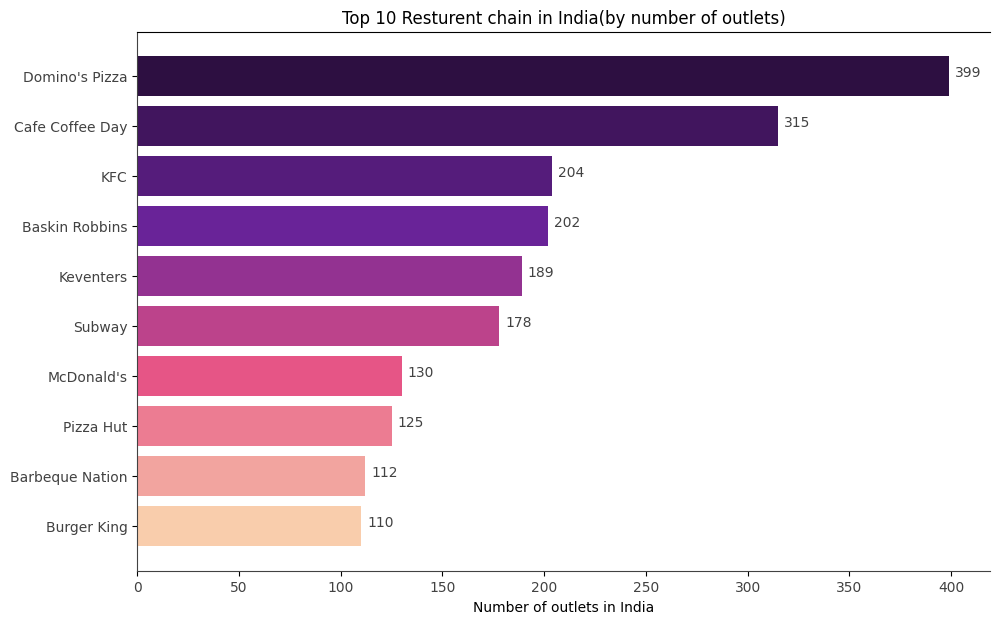

In [44]:
height = top10_chains.values 
bars = top10_chains.index  
y_pos = np.arange(len(bars))  

fig = plt.figure(figsize=[11, 7], frameon=False)
ax =  fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242") 

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors) 

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242") 
plt.xlabel("Number of outlets in India") 

for i,v in enumerate(height): 
    ax.text(v+3, i, str(v), color='#424242') 
plt.title("Top 10 Resturent chain in India(by number of outlets)") 

plt.show()
